In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from FCI_functions.FCI_functions import calculate_pre_score, calculate_post_score, calculate_question_score_post, calculate_question_score_pre

In [2]:
df16_111 = pd.read_excel('rawdata/2016-17 WT1 Phys 111 ALL Data - Shared with Chelsea.xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df16_112 = pd.read_excel('rawdata/2016-17 WT1 Phys 112 ALL Data - Shared with Chelsea.xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df14_111 = pd.read_excel('rawdata/2014-15 WT1 Phys 111 ALL Data - Shared with Chelsea (20210212).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df14_112 = pd.read_excel('rawdata/2014-15 WT1 Phys 112 ALL Data - Shared with Chelsea (20210212).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df15_111 = pd.read_excel('rawdata/2015-16 WT1 Phys 111 ALL Data - Shared with Chelsea.xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df15_112 = pd.read_excel('rawdata/2015-16 WT1 Phys 112 ALL Data - Shared with Chelsea.xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df17_111 = pd.read_excel('rawdata/2017-18 WT1 Phys 111 ALL Data - Shared with David (20190612).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df17_112 = pd.read_excel('rawdata/2017-18 WT1 Phys 112 ALL Data - Shared with David (20190612).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df18_111 = pd.read_excel('rawdata/2018-19 WT1 Phys 111 ALL Data - Shared with David (20190530).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df18_112 = pd.read_excel('rawdata/2018-19 WT1 Phys 112 ALL Data - Shared with David (20190527).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)#.drop(df18_112[df18_112['Secondary'] == L15].index)
df19_111 = pd.read_excel('rawdata/2019-20 WT1 Phys 111 ALL Data - Shared with Maya (20211222).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df19_112 = pd.read_excel('rawdata/2019-20 WT1 Phys 112 ALL Data - Shared with Maya (20211222).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df20 = pd.read_excel('rawdata/2020-21 WT1 Phys 111&112 ALL Data - Shared with Chelsea (20210329).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
is_111 = df20['Course'] == 111
df20_111 = df20[is_111]
is_112 = df20['Course'] == 112
df20_112 = df20[is_112]

df21_111 = pd.read_excel('2021raw_corrected.xlsx')

In [3]:
def calculate_pre_score_FDM(student):
    corr_ans = ['C' , 'D', 'B' , 'C', 'B' , 'C' , 'E', 'A', 'C' , 'D' , 'E', 'A']
    score = 0
    questions = [5, 5, 11, 11, 13, 13, 13, 17, 18, 18, 18, 27]
    for i in range(11):
        string = "PRE Q"+ str(questions[i])
        if string in student:
            if student[string]==corr_ans[i]:
                score+=1                
            if pd.isna(student[string]):
                score=None
                break
            
    return (score)

In [4]:
def calculate_pre_score_FDM_2021(student):
    corr_ans = [3 , 4, 2 , 3, 2 , 3 , 5, 1, 3 , 4 , 5, 1]
    score = 0
    questions = [5, 5, 11, 11, 13, 13, 13, 17, 18, 18, 18, 27]
    for i in range(12):
        string = "PRE Q"+ str(questions[i])
        if string in student:
            if student[string]==corr_ans[i]:
                score+=1                
            if pd.isna(student[string]):
                score=None
                break
            
    return (score)

In [5]:
def calculate_pre_score_FDM_2020(student):
    corr_ans = [3 , 4, 2 , 3, 2 , 3 , 5, 1, 3 , 4 , 5, 1]
    score = 0
    questions = [5, 5, 11, 11, 13, 13, 13, 17, 18, 18, 18, 27]
    for i in range(12):
        string = "PRE Q"+ str(questions[i])
        if string in student:
            if student[string]==corr_ans[i]:
                score+=1
            if pd.isna(student[string]):
                score=None
                break
            
    return (score)

In [6]:
def calculate_post_score_FDM(student):
    corr_ans = ['C' , 'D', 'B' , 'C', 'B' , 'C' , 'E', 'A', 'C' , 'D' , 'E', 'A']
    score = 0
    questions = [5, 5, 11, 11, 13, 13, 13, 17, 18, 18, 18, 27]
    for i in range(11):
        string = "POST Q"+ str(questions[i])
        if string in student:
            if student[string]==corr_ans[i]:
                score+=1
            if pd.isna(student[string]):
                score=None
                break
            
    return (score)

In [7]:
def calculate_post_score_FDM_2021(student):
    corr_ans = [3 , 4, 2 , 3, 2 , 3 , 5, 1, 2 , 4 , 5, 1]
    score = 0
    questions = [5, 5, 11, 11, 13, 13, 13, 17, 18, 18, 18, 27]
    for i in range(12):
        string = "POST Q"+ str(questions[i])
        if string in student:
            if student[string]==corr_ans[i]:
                score+=1
            if pd.isna(student[string]):
                score=None
                break
            
    return (score)

In [8]:
def calculate_post_score_FDM_2020(student):
    corr_ans = [3 , 4, 2 , 3, 2 , 3 , 5, 1, 3 , 4 , 5, 1]
    score = 0
    questions = [5, 5, 11, 11, 13, 13, 13, 17, 18, 18, 18, 27]
    for i in range(12):
        string = "POST Q"+ str(questions[i])
        if string in student:
            if student[string]==corr_ans[i]:
                score+=1
            if pd.isna(student[string]):
                score=None
                break
            
    return (score)

In [9]:
fdm111 = pd.DataFrame()
fdm112 = pd.DataFrame()

In [10]:
def FDM(df111, df112, year):
    df111.apply(calculate_post_score_FDM, axis=1).plot.hist(alpha=0.5, bins=6)
    df111.apply(calculate_pre_score_FDM, axis=1).plot.hist(alpha=0.5, bins=6)
    plt.legend(["post", "pre"])
    plt.title("111 " + year)
    #plt.xlim(0,7)
    plt.show()
    
    df1 = df111.apply(calculate_pre_score_FDM, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "111 PRE " + year)
    fdm111["111 PRE" + year] = df1
    df1["111 POST "+ year] = df111.apply(calculate_post_score_FDM, axis=1).value_counts(normalize=True, ascending=True)
    fdm111["111 POST" + year] = df1["111 POST "+ year]

    print(df1)

    df112.apply(calculate_post_score_FDM, axis=1).plot.hist(alpha=0.5, bins=7)
    df112.apply(calculate_pre_score_FDM, axis=1).plot.hist(alpha=0.5, bins=7)
    plt.legend(["post", "pre"])
    plt.title("112 "+ year)
    #plt.xlim(0,7)
    plt.show()

    df2 = df112.apply(calculate_pre_score_FDM, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "112 PRE " + year)
    fdm112["112 PRE" + year] = df2
    df2["112 POST " + year] = df112.apply(calculate_post_score_FDM, axis=1).value_counts(normalize=True, ascending=True)
    fdm112["112 POST" + year] = df2["112 POST "+ year]
    
    print(df2)

    is_f111 = df111['PRE Q85']== 'A'
    df_f111 = df111[is_f111]
    
    is_f112 = df112['PRE Q85']== 'A'
    df_f112 = df112[is_f112]

    df_f111.apply(calculate_post_score_FDM, axis=1).plot.hist(alpha=0.5, bins=7)
    df_f111.apply(calculate_pre_score_FDM, axis=1).plot.hist(alpha=0.5, bins=7)
    plt.legend(["post", "pre"])
    plt.title("Female 111 " + year)
    plt.show()
    
    df3 = df111.apply(calculate_pre_score_FDM, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "111 FEMALE PRE")
    df3["111 FEMALE POST " + year ] = df111.apply(calculate_post_score_FDM, axis=1).value_counts(normalize=True, ascending=True)

    print(df3)
    
    df_f112.apply(calculate_post_score_FDM, axis=1).plot.hist(alpha=0.5, bins=7)
    df_f112.apply(calculate_pre_score_FDM, axis=1).plot.hist(alpha=0.5, bins=7)
    plt.legend(["post", "pre"])
    plt.title("Female 112 " + year)
    plt.show()
    
    df4 = df112.apply(calculate_pre_score_FDM, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "112 FEMALE PRE")
    df4["112 FEMALE POST " + year] = df112.apply(calculate_post_score_FDM, axis=1).value_counts(normalize=True, ascending=True)
    print(df4)

In [11]:
def FDM_2020(df111, df112):
    year = '2020'
    df111.apply(calculate_post_score_FDM_2020, axis=1).plot.hist(alpha=0.5, bins=7)
    df111.apply(calculate_pre_score_FDM_2020, axis=1).plot.hist(alpha=0.5, bins=7)
    plt.legend(["post", "pre"])
    plt.title("111")
    #plt.xlim(0,7)
    plt.show()
    
    df1 = df111.apply(calculate_pre_score_FDM_2020, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "111 PRE")
    df1["111 POST"] = df111.apply(calculate_post_score_FDM_2020, axis=1).value_counts(normalize=True, ascending=True)

    print(df1)

    df112.apply(calculate_post_score_FDM_2020, axis=1).plot.hist(alpha=0.5, bins=7)
    df112.apply(calculate_pre_score_FDM_2020, axis=1).plot.hist(alpha=0.5, bins=7)
    plt.legend(["post", "pre"])
    plt.title("112")
    #plt.xlim(0,7)
    plt.show()

    df2 = df112.apply(calculate_pre_score_FDM_2020, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "112 PRE")
    df2["112 POST " + year] = df112.apply(calculate_post_score_FDM_2020, axis=1).value_counts(normalize=True, ascending=True)
    print(df2)

    is_f111 = df111['PRE Q12']== 1
    df_f111 = df111[is_f111]
    
    is_f112 = df112['PRE Q12']== 1
    df_f112 = df112[is_f112]

    df_f111.apply(calculate_post_score_FDM_2020, axis=1).plot.hist(alpha=0.5, bins=7)
    df_f111.apply(calculate_pre_score_FDM_2020, axis=1).plot.hist(alpha=0.5, bins=7)
    plt.legend(["post", "pre"])
    plt.title("Female 111")
    plt.show()
    
    df3 = df111.apply(calculate_pre_score_FDM_2020, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "111 FEMALE PRE")
    df3["111 FEMALE POST"] = df111.apply(calculate_post_score_FDM_2020, axis=1).value_counts(normalize=True, ascending=True)

    print(df3)
    
    df_f112.apply(calculate_post_score_FDM_2020, axis=1).plot.hist(alpha=0.5, bins=7)
    df_f112.apply(calculate_pre_score_FDM_2020, axis=1).plot.hist(alpha=0.5, bins=7)
    plt.legend(["post", "pre"])
    plt.title("Female 112")
    plt.show()
    
    df4 = df112.apply(calculate_pre_score_FDM_2020, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "112 FEMALE PRE")
    df4["112 FEMALE POST"] = df112.apply(calculate_post_score_FDM_2020, axis=1).value_counts(normalize=True, ascending=True)
    print(df4)

In [12]:
def FDM_2021(df111, df112):
    year = '2021'
    df111.apply(calculate_post_score_FDM_2021, axis=1).plot.hist(alpha=0.5, bins=7)
    df111.apply(calculate_pre_score_FDM_2021, axis=1).plot.hist(alpha=0.5, bins=7)
    plt.legend(["post", "pre"])
    plt.title("111")
    #plt.xlim(0,7)
    plt.show()
    
    df1 = df111.apply(calculate_pre_score_FDM_2021, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "111 PRE")
    df1["111 POST"] = df111.apply(calculate_post_score_FDM_2021, axis=1).value_counts(normalize=True, ascending=True)

    print(df1)

    df112.apply(calculate_post_score_FDM_2021, axis=1).plot.hist(alpha=0.5, bins=7)
    df112.apply(calculate_pre_score_FDM_2021, axis=1).plot.hist(alpha=0.5, bins=7)
    plt.legend(["post", "pre"])
    plt.title("112")
    #plt.xlim(0,7)
    plt.show()

    df2 = df112.apply(calculate_pre_score_FDM_2021, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "112 PRE")
    df2["112 POST " + year] = df112.apply(calculate_post_score_FDM_2021, axis=1).value_counts(normalize=True, ascending=True)
    print(df2)

    is_f111 = df111['PRE Q12']== 1
    df_f111 = df111[is_f111]
    
    is_f112 = df112['PRE Q12']== 1
    df_f112 = df112[is_f112]

    df_f111.apply(calculate_post_score_FDM_2021, axis=1).plot.hist(alpha=0.5, bins=7)
    df_f111.apply(calculate_pre_score_FDM_2021, axis=1).plot.hist(alpha=0.5, bins=7)
    plt.legend(["post", "pre"])
    plt.title("Female 111")
    plt.show()
    
    df3 = df111.apply(calculate_pre_score_FDM_2021, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "111 FEMALE PRE")
    df3["111 FEMALE POST"] = df111.apply(calculate_post_score_FDM_2021, axis=1).value_counts(normalize=True, ascending=True)

    print(df3)
    
    df_f112.apply(calculate_post_score_FDM_2021, axis=1).plot.hist(alpha=0.5, bins=7)
    df_f112.apply(calculate_pre_score_FDM_2021, axis=1).plot.hist(alpha=0.5, bins=7)
    plt.legend(["post", "pre"])
    plt.title("Female 112")
    plt.show()
    
    df4 = df112.apply(calculate_pre_score_FDM_2021, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "112 FEMALE PRE")
    df4["112 FEMALE POST"] = df112.apply(calculate_post_score_FDM_2021, axis=1).value_counts(normalize=True, ascending=True)
    print(df4)

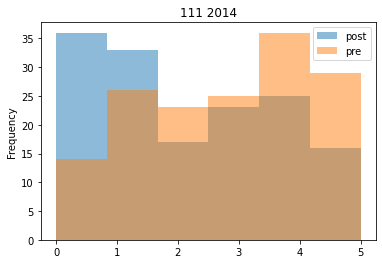

     111 PRE 2014  111 POST 2014
0.0      0.091503       0.240000
2.0      0.150327       0.113333
3.0      0.163399       0.153333
1.0      0.169935       0.220000
5.0      0.189542       0.106667
4.0      0.235294       0.166667


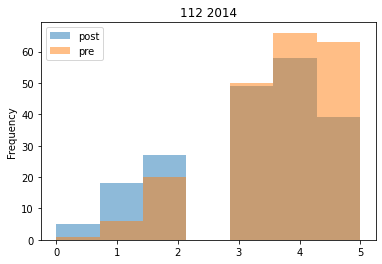

     112 PRE 2014  112 POST 2014
0.0      0.004854       0.025510
1.0      0.029126       0.091837
2.0      0.097087       0.137755
3.0      0.242718       0.250000
5.0      0.305825       0.198980
4.0      0.320388       0.295918


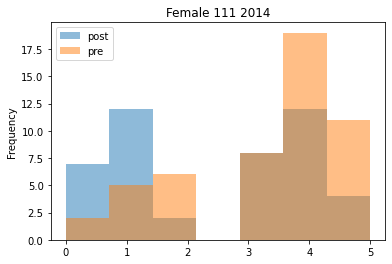

     111 FEMALE PRE  111 FEMALE POST 2014
0.0        0.091503              0.240000
2.0        0.150327              0.113333
3.0        0.163399              0.153333
1.0        0.169935              0.220000
5.0        0.189542              0.106667
4.0        0.235294              0.166667


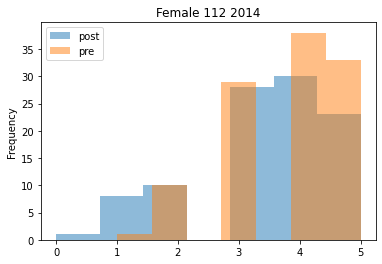

     112 FEMALE PRE  112 FEMALE POST 2014
0.0        0.004854              0.025510
1.0        0.029126              0.091837
2.0        0.097087              0.137755
3.0        0.242718              0.250000
5.0        0.305825              0.198980
4.0        0.320388              0.295918


In [13]:
FDM(df14_111, df14_112, "2014")

In [14]:
fdm111

,111 PRE2014,111 POST2014
0.0,0.091503,0.240000
2.0,0.150327,0.113333
3.0,0.163399,0.153333
1.0,0.169935,0.220000
5.0,0.189542,0.106667
4.0,0.235294,0.166667


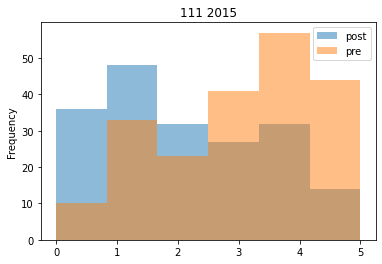

     111 PRE 2015  111 POST 2015
0.0      0.048077       0.190476
2.0      0.110577       0.169312
1.0      0.158654       0.253968
3.0      0.197115       0.142857
5.0      0.211538       0.074074
4.0      0.274038       0.169312


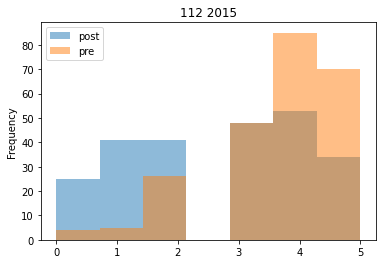

     112 PRE 2015  112 POST 2015
0.0      0.016807       0.103306
1.0      0.021008       0.169421
2.0      0.109244       0.169421
3.0      0.201681       0.198347
5.0      0.294118       0.140496
4.0      0.357143       0.219008


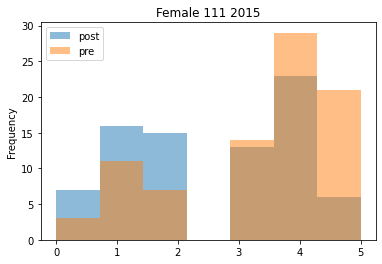

     111 FEMALE PRE  111 FEMALE POST 2015
0.0        0.048077              0.190476
2.0        0.110577              0.169312
1.0        0.158654              0.253968
3.0        0.197115              0.142857
5.0        0.211538              0.074074
4.0        0.274038              0.169312


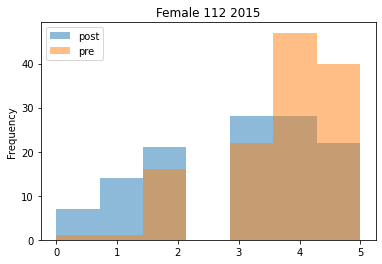

     112 FEMALE PRE  112 FEMALE POST 2015
0.0        0.016807              0.103306
1.0        0.021008              0.169421
2.0        0.109244              0.169421
3.0        0.201681              0.198347
5.0        0.294118              0.140496
4.0        0.357143              0.219008


In [15]:
FDM(df15_111, df15_112, "2015")

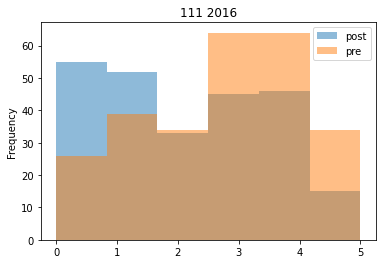

     111 PRE 2016  111 POST 2016
0.0      0.099617       0.223577
2.0      0.130268       0.134146
5.0      0.130268       0.060976
1.0      0.149425       0.211382
3.0      0.245211       0.182927
4.0      0.245211       0.186992


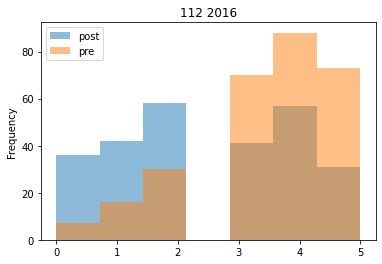

     112 PRE 2016  112 POST 2016
0.0      0.024648       0.135849
1.0      0.056338       0.158491
2.0      0.105634       0.218868
3.0      0.246479       0.154717
5.0      0.257042       0.116981
4.0      0.309859       0.215094


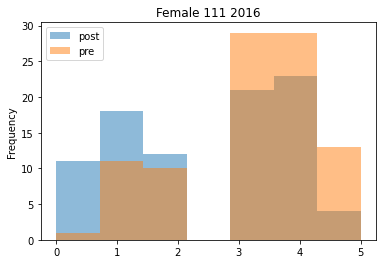

     111 FEMALE PRE  111 FEMALE POST 2016
0.0        0.099617              0.223577
2.0        0.130268              0.134146
5.0        0.130268              0.060976
1.0        0.149425              0.211382
3.0        0.245211              0.182927
4.0        0.245211              0.186992


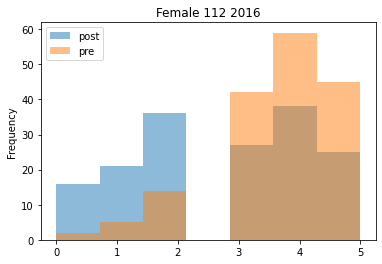

     112 FEMALE PRE  112 FEMALE POST 2016
0.0        0.024648              0.135849
1.0        0.056338              0.158491
2.0        0.105634              0.218868
3.0        0.246479              0.154717
5.0        0.257042              0.116981
4.0        0.309859              0.215094


In [16]:
FDM(df16_111, df16_112, "2016")

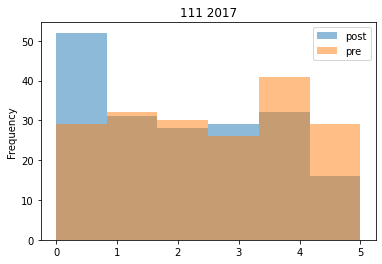

     111 PRE 2017  111 POST 2017
3.0      0.139037       0.154255
5.0      0.155080       0.085106
0.0      0.155080       0.276596
2.0      0.160428       0.148936
1.0      0.171123       0.164894
4.0      0.219251       0.170213


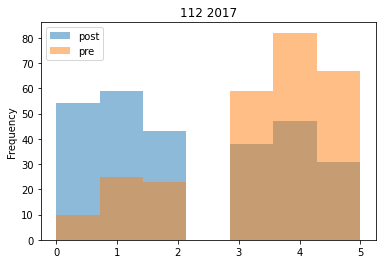

     112 PRE 2017  112 POST 2017
0.0      0.037594       0.198529
2.0      0.086466       0.158088
1.0      0.093985       0.216912
3.0      0.221805       0.139706
5.0      0.251880       0.113971
4.0      0.308271       0.172794


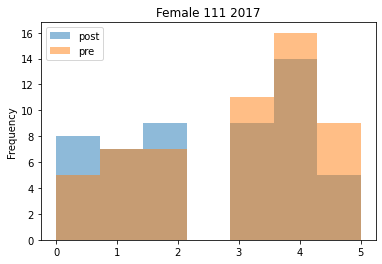

     111 FEMALE PRE  111 FEMALE POST 2017
3.0        0.139037              0.154255
5.0        0.155080              0.085106
0.0        0.155080              0.276596
2.0        0.160428              0.148936
1.0        0.171123              0.164894
4.0        0.219251              0.170213


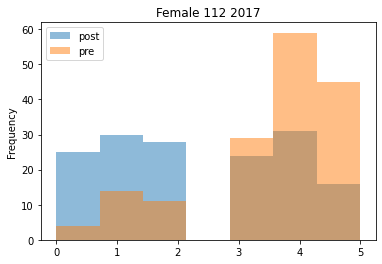

     112 FEMALE PRE  112 FEMALE POST 2017
0.0        0.037594              0.198529
2.0        0.086466              0.158088
1.0        0.093985              0.216912
3.0        0.221805              0.139706
5.0        0.251880              0.113971
4.0        0.308271              0.172794


In [17]:
FDM(df17_111, df17_112, "2017")

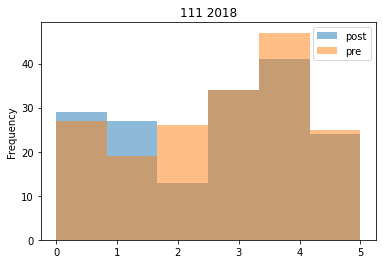

     111 PRE 2018  111 POST 2018
1.0      0.106742       0.160714
5.0      0.140449       0.142857
2.0      0.146067       0.077381
0.0      0.151685       0.172619
3.0      0.191011       0.202381
4.0      0.264045       0.244048


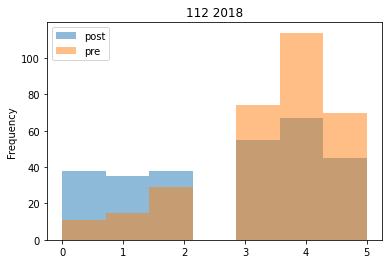

     112 PRE 2018  112 POST 2018
0.0      0.035144       0.136691
1.0      0.047923       0.125899
2.0      0.092652       0.136691
5.0      0.223642       0.161871
3.0      0.236422       0.197842
4.0      0.364217       0.241007


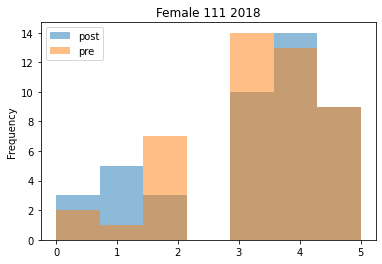

     111 FEMALE PRE  111 FEMALE POST 2018
1.0        0.106742              0.160714
5.0        0.140449              0.142857
2.0        0.146067              0.077381
0.0        0.151685              0.172619
3.0        0.191011              0.202381
4.0        0.264045              0.244048


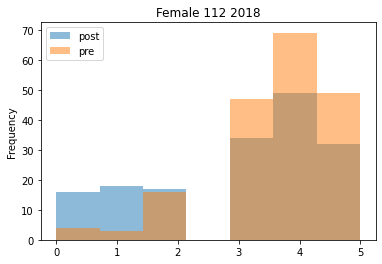

     112 FEMALE PRE  112 FEMALE POST 2018
0.0        0.035144              0.136691
1.0        0.047923              0.125899
2.0        0.092652              0.136691
5.0        0.223642              0.161871
3.0        0.236422              0.197842
4.0        0.364217              0.241007


In [18]:
FDM(df18_111, df18_112, "2018")

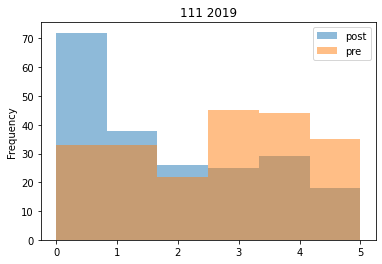

     111 PRE 2019  111 POST 2019
2.0      0.103774       0.125000
1.0      0.155660       0.182692
0.0      0.155660       0.346154
5.0      0.165094       0.086538
4.0      0.207547       0.139423
3.0      0.212264       0.120192


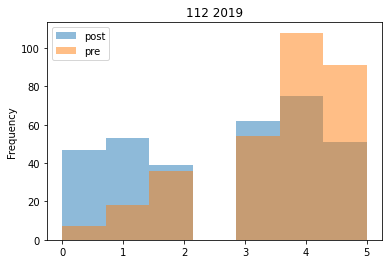

     112 PRE 2019  112 POST 2019
0.0      0.022293       0.143731
1.0      0.057325       0.162080
2.0      0.114650       0.119266
3.0      0.171975       0.189602
5.0      0.289809       0.155963
4.0      0.343949       0.229358


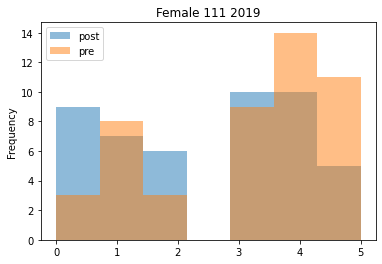

     111 FEMALE PRE  111 FEMALE POST 2019
2.0        0.103774              0.125000
1.0        0.155660              0.182692
0.0        0.155660              0.346154
5.0        0.165094              0.086538
4.0        0.207547              0.139423
3.0        0.212264              0.120192


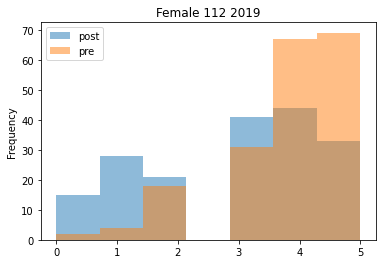

     112 FEMALE PRE  112 FEMALE POST 2019
0.0        0.022293              0.143731
1.0        0.057325              0.162080
2.0        0.114650              0.119266
3.0        0.171975              0.189602
5.0        0.289809              0.155963
4.0        0.343949              0.229358


In [19]:
FDM(df19_111, df19_112, "2019")

In [ ]:
FDM_2020(df20_111, df20_112)

In [ ]:
FDM_2021(df21_111, df21_111)

In [ ]:
fdm111

In [ ]:
fdm112

In [ ]:
fdm = fdm111.join(fdm112)
fdm.loc[-1] = [111, 111, 111, 111, 111, 111,111, 111, 111, 111, 111, 111,112 ,112, 112, 112 ,112, 112,112 ,112, 112, 112 ,112, 112 ]
fdm.loc[-2] = [2014, 2014, 2015, 2015, 2016, 2016, 2017, 2017, 2018, 2018, 2019, 2019, 2014, 2014, 2015, 2015, 2016, 2016, 2017, 2017, 2018, 2018, 2019, 2019]
fdm.loc[-3] = ["Pre", "Post", "Pre", "Post", "Pre", "Post", "Pre", "Post", "Pre", "Post", "Pre", "Post", "Pre", "Post", "Pre", "Post", "Pre", "Post", "Pre", "Post", "Pre", "Post", "Pre", "Post"] # adding a row
fdm.sort_index()

In [ ]:
fdm2 = fdm.sort_index().transpose()
fdm2.columns=["Pre/Post", "Year", "Section", 0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
fdm3 = fdm2.transpose()
fdm3

In [ ]:
fdm4 = fdm2[fdm2.loc[:,"Pre/Post"]=="Pre"]
fdm4

In [ ]:
import seaborn as sns
#sns.set_theme(style="whitegrid")
ax = sns.violinplot(data = fdm112.sort_index().transpose())

In [ ]:
ax1 = sns.violinplot(x=fdm112.iloc[1])

In [ ]:
ax2 = sns.violinplot(x=fdm112.iloc[2])

In [ ]:
ax3 = sns.violinplot(x=fdm112.iloc[4])

In [ ]:
ax3 = sns.violinplot(x=fdm112.iloc[5])

In [ ]:
ax3 = sns.violinplot(x=fdm112.iloc[6])

In [ ]:
ax3 = sns.violinplot(x=fdm112.iloc[3])